In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.churn = (df.churn == 'yes').astype(int)

In [5]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [6]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
               'phoneservice', 'multiplelines', 'internetservice',
               'onlinesecurity', 'onlinebackup', 'deviceprotection',
               'techsupport', 'streamingtv', 'streamingmovies',
               'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [7]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

In [8]:
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [9]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict_proba(X_val)[:, 1]

In [10]:
small_subset = ['contract', 'tenure', 'totalcharges']
train_dict_small = df_train[small_subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,1
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [11]:
val_dict_small = df_val[small_subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)

y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

Accuracy

In [12]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5   # using 50% threshold
(churn == y_val).mean()

np.float64(0.8016129032258065)

In [13]:
# Out of a total of 1860 customers, 80% prediction was correct
# Accuracy here is number of correct/total
total_num = len(y_val)
num_correct = (churn == y_val).sum()      # 1491
accuracy = num_correct/total_num
accuracy        # accuracy here is the same

np.float64(0.8016129032258065)

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


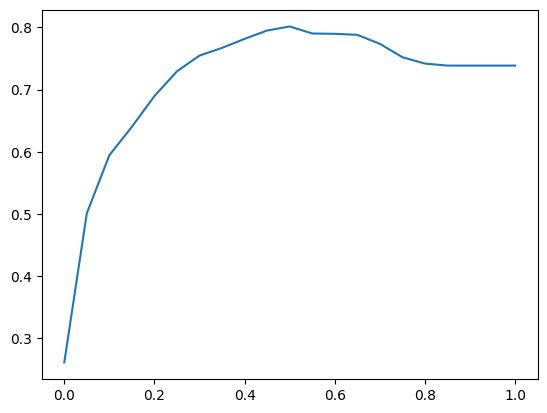

In [14]:
# Lets change our threshold to see if it'll improve our accuracy
thresholds = np.linspace(0, 1, 21)  # This will give us threshold between 0 and 1

accuracies = []

for t in thresholds:
    churn = (y_pred >= t)   # using different threshold
    accuracy = (churn == y_val).mean()
    accuracies.append(accuracy)
    print('%0.2f %0.3f' % (t, accuracy))

# we also plot scores against threshold
plt.plot(thresholds, accuracies)
# this shows that 50% is the best threshold
# This also says that if we choose a threshold of 100%, 
# our acccuracy will be 73.9% accurate. This is a problem (its called a class imbalance)

In [15]:
#  Using scikit-learn
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
    acc = accuracy_score(y_val, y_pred >= t)
    accuracies.append(acc)
    print('%0.2f %0.3f' % (t, acc))

0.00 0.261
0.05 0.501
0.10 0.595
0.15 0.640
0.20 0.690
0.25 0.730
0.30 0.755
0.35 0.767
0.40 0.782
0.45 0.795
0.50 0.802
0.55 0.790
0.60 0.790
0.65 0.788
0.70 0.774
0.75 0.752
0.80 0.742
0.85 0.739
0.90 0.739
0.95 0.739
1.00 0.739


In [16]:
from collections import Counter

Counter(y_pred >= 0.5)
# This counts all the value types

Counter({np.False_: 1399, np.True_: 461})

# Confusion Table

In [17]:
# A way of evaluating iur model that wont be affected by the class imbalance
# we will look at different types of errors and correct decisions
# we'll also arrange them in a table

In [ ]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [ ]:
t = 0.5
pred_positive = (y_pred >= t)
pred_negative = (y_pred < t)

In [32]:
tp = (actual_positive & pred_positive)
tp[:20]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True])

In [27]:
actual_positive[:20]

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False,  True, False, False,  True,  True, False,
        True,  True])

In [26]:
pred_positive[:20]

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True])

In [35]:
tp = (actual_positive & pred_positive).sum()
tn = (actual_negative & pred_negative).sum()
fp = (pred_positive & actual_negative).sum()
fn = (pred_negative & actual_positive).sum()

tp, tn, fp, fn

(np.int64(289), np.int64(1202), np.int64(172), np.int64(197))

In [37]:
# Creating confusion matrix
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1202,  172],
       [ 197,  289]])

In [45]:
# confusion_matrix.sum()  # 1860
# y_val.sum()     # 486
(confusion_matrix / confusion_matrix.sum()).round(2)
# This tells us what kind of correct decision our model is making
# tn=65%, fp=9%, fn=11%, tp=16%

array([[0.65, 0.09],
       [0.11, 0.16]])

# Precision and Recall

In [46]:
# we can use tp, tn, fp, fn to define accuracy
(tp + tn) / (tp + tn + fp + fn)
# 0.8016129032258065

np.float64(0.8016129032258065)

In [48]:
# Precision tells us what fraction of positive predictions were correct
# It considers both true and false positives
p = tp / (tp + fp)
p   # 63%
# 37% wrong prediction/wont churn

np.float64(0.6268980477223427)

In [51]:
# Recall tells us what fraction of true outcomes (churn/no-churn) were correctly predicted
# it considers both true positive and false negative. 
# the customers that are actually churning
# It tells us the percentage of correctness considering the total outcome of the event. 
# i.e for churn: both tp and fn ended up churning. what fraction of that did we get.
r = tp / (tp + fn)
r   # 59%
# 41% missing/not accounted for/failed to identify 41% of users

np.float64(0.5946502057613169)

# ROC Curves
- TPR and FPR

In [53]:
# From precision and recall, our model is not that great. we cant rely on that accuracy
# We use Receiver Operating Characteristics: True Positive Rate and False Positive Rate (TPR and FPR)
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
print (fpr, tpr)
# fpr should be as small as possible 
# tpr is be closer to 1 as possible


0.12518195050946143 0.5946502057613169


In [54]:
# ROC curves does this evaluation for all possible threshold
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)

    pred_positive = (y_pred >= t)
    pred_negative = (y_pred < t)

    tp = (actual_positive & pred_positive).sum()
    tn = (actual_negative & pred_negative).sum()
    fp = (pred_positive & actual_negative).sum()
    fn = (pred_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [59]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores
df_scores[::10]     # This prints every record in increment of 10

,threshold,tp,fp,fn,tn
0,0.0,486,1374,0,0
10,0.1,458,726,28,648
20,0.2,421,512,65,862
30,0.3,380,350,106,1024
40,0.4,337,257,149,1117
50,0.5,289,172,197,1202
60,0.6,200,105,286,1269
70,0.7,99,34,387,1340
80,0.8,7,1,479,1373
90,0.9,0,0,486,1374


In [60]:
# computing tpr and fpr and also appending to the record
df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)

df_scores[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,486,1374,0,0,1.000000,1.000000
10,0.1,458,726,28,648,0.942387,0.528384
20,0.2,421,512,65,862,0.866255,0.372635
30,0.3,380,350,106,1024,0.781893,0.254731
40,0.4,337,257,149,1117,0.693416,0.187045
50,0.5,289,172,197,1202,0.594650,0.125182
60,0.6,200,105,286,1269,0.411523,0.076419
70,0.7,99,34,387,1340,0.203704,0.024745
80,0.8,7,1,479,1373,0.014403,0.000728
90,0.9,0,0,486,1374,0.000000,0.000000


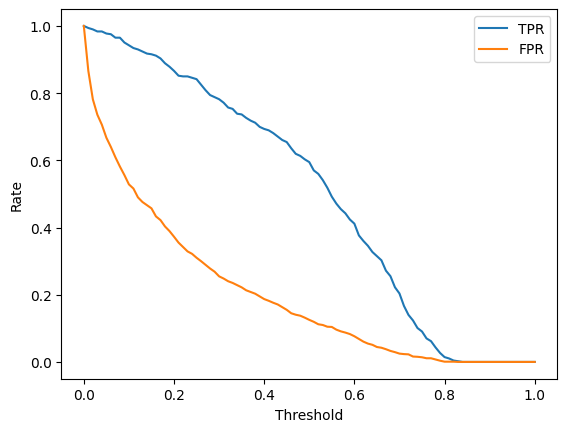

In [61]:
# we plot
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

plt.xlabel('Threshold')
plt.ylabel('Rate')

plt.legend()
plt.show()

## Random Model

In [62]:
# A way to get churn/no-churn information from our plot
# we start by assigning every customer a random number between 0 and 1
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.417, 0.72 , 0.   , ..., 0.148, 0.923, 0.044], shape=(1860,))

In [65]:
((y_rand >= 0.5) == y_val).mean()
# gives an accuracy of 47%

np.float64(0.478494623655914)

In [66]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        pred_positive = (y_pred >= t)
        pred_negative = (y_pred < t)

        tp = (actual_positive & pred_positive).sum()
        tn = (actual_negative & pred_negative).sum()
        fp = (pred_positive & actual_negative).sum()
        fn = (pred_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores["tpr"] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores["fpr"] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

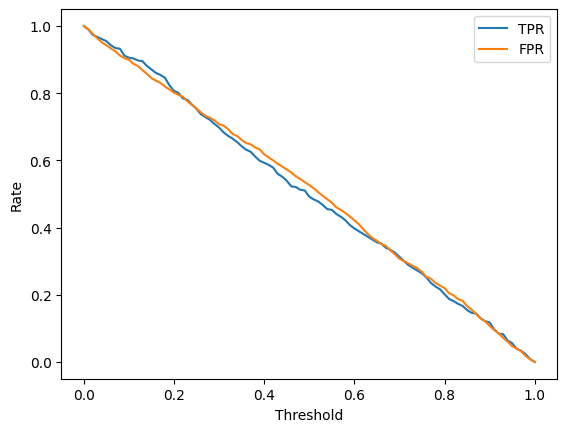

In [72]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df_rand[::10]

# we plot against our random
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.xlabel('Threshold')
plt.ylabel('Rate')

plt.legend()
plt.show()

## Ideal Model

In [73]:
# Ideal model sorts the churn to no-churn first
# 
num_pos = (y_val == 1).sum()
num_neg = (y_val == 0).sum()
num_pos, num_neg

(np.int64(486), np.int64(1374))

In [74]:
# A way to carry out the sorting/ordering is by using "repeat"
y_ideal = np.repeat([0, 1], [num_neg, num_pos])     # This repeats 0 and 1, num_neg and num_pos times respectively
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1860,))

In [84]:
1 - y_val.mean()

np.float64(0.7387096774193549)

In [88]:
# we create our prediction. we pick random numbers
# we use a threshold of 73.87% and compare it with the sorted ideal
# then we check the accuracy
y_ideal_pred = np.linspace(0, 1, len(y_val))
y_ideal_pred
((y_ideal_pred >= 0.7387) == y_ideal).mean()
# for people above the 73.87% threshold, they churned
# This ideal model doesnt exist in reality but it helps us to benchmark the model that we have

np.float64(1.0)

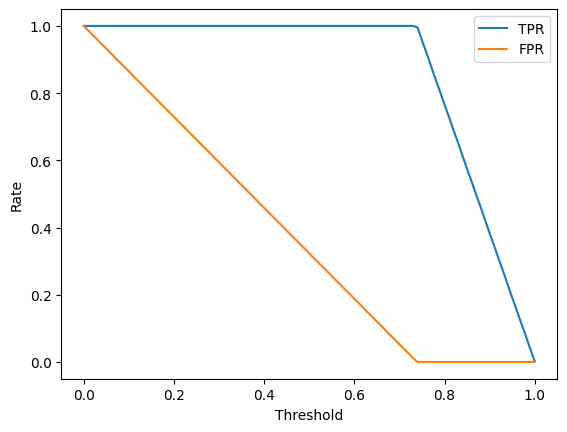

In [90]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

# we plot against our ideal
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')

plt.xlabel('Threshold')
plt.ylabel('Rate')

plt.legend()
plt.show()

### Putting everything together

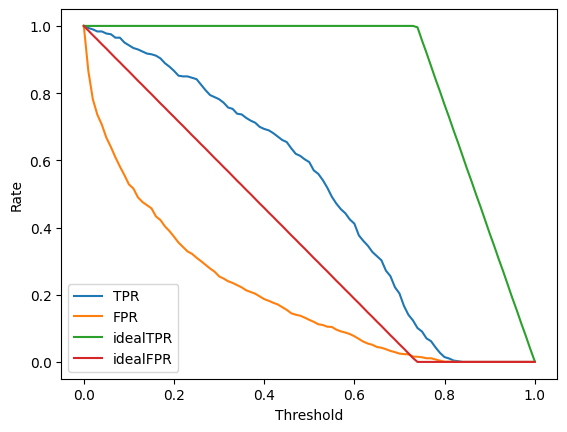

In [94]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='idealTPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='idealFPR')

plt.xlabel('Threshold')
plt.ylabel('Rate')

plt.legend()
plt.show()
# we can see here that the fpr and tpr of the scores differ from that of the ideal
# it should approach 1 on the tpr, and 0 on the fpr
# Another issue is the ideal plot uses a threshold of 73.87% while the scores uses 50%
# we have to plot fpr against tpr

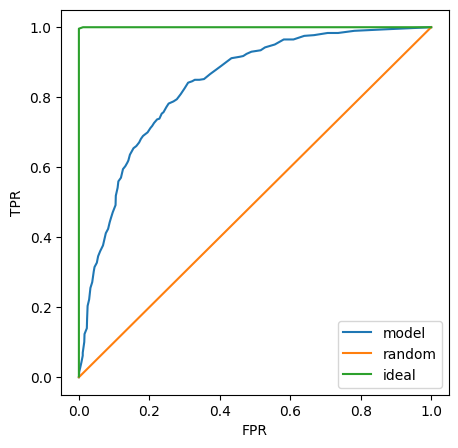

In [102]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='model')
plt.plot([0, 1], [0, 1], label='random')
# plt.plot(df_rand.fpr, df_rand.tpr, label='random')
plt.plot(df_ideal.fpr, df_ideal.tpr, label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()
# we want our model to be close as possible to the ideal

#### using scikit learn

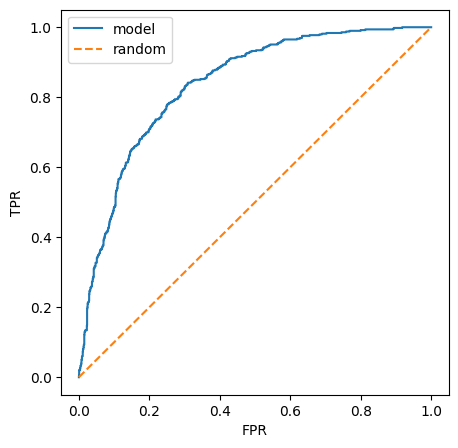

In [113]:
# Plotting ROC using Scikit-learn
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)
# fpr[:10], tpr[:10], thresholds[:10]

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='model')
plt.plot([0, 1], [0, 1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()
plt.show()

## ROC AUC
- Area Under Curve
- Interpretation of AUC

In [116]:
from sklearn.metrics import auc
auc(fpr, tpr)       # 0.8363396349608545
auc(df_scores.fpr, df_scores.tpr)      # 0.8359001084215382
auc(df_ideal.fpr, df_ideal.tpr)      # 0.9999760394390833

0.9999760394390833

In [117]:
from sklearn.metrics import roc_auc_score, roc_curve
# fpr, tpr, thresholds = roc_curve(y_val, y_pred)
roc_auc_score(y_val, y_pred)
# a way of getting the auc using validation and prediction churn

0.8363396349608545

In [122]:
y_pred[y_val == 0]

array([0.23491107, 0.3194518 , 0.04552535, ..., 0.05725275, 0.61523039,
       0.06127263], shape=(1374,))

In [130]:
# AUC: the probability that a randomly selected positive example has a 
# higher score than a randomly selected negative exavple
import random

neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

n = 100000
success = 0

for i in range(n):
    pos_index = random.randint(0, len(pos) - 1)
    neg_index = random.randint(0, len(neg) - 1)

    if pos[pos_index] > neg[neg_index]:
        success = success + 1

print(success)
success / n

83662


0.83662

In [131]:
# using numpy
n = 100000

np.random.seed(1)
pos_index = np.random.randint(0, len(pos), size=n)
neg_index = np.random.randint(0, len(neg), size=n)

(pos[pos_index] > neg[neg_index]).mean()

np.float64(0.83827)

## Cross-validation
- Evaluating the same model on different subsets of data
- Getting the average prediction and the spread within predictions

In [132]:
def train(df, y):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(dicts)

    X = dv.transform(dicts)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')
    
    X = dv.transform(dicts)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [133]:
dv, model = train(df_train, y_train)
y_pred = predict(df_val, dv, model)

In [134]:
# implementing k-fold cross validation
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.churn.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [136]:
aucs, np.mean(aucs), np.std(aucs)

([0.8493392490816277,
  0.8413366336633662,
  0.8590269587894291,
  0.8330260883877869,
  0.8242555831265509,
  0.840959040959041,
  0.8437154021491371,
  0.8243595825426946,
  0.8450570623981029,
  0.8611811367685119],
 np.float64(0.8422256737866247),
 np.float64(0.011964866306745812))

In [137]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))
np.array(aucs).round(3)

auc = 0.842 ± 0.012


array([0.849, 0.841, 0.859, 0.833, 0.824, 0.841, 0.844, 0.824, 0.845,
       0.861])

#### Parameter tuning

In [144]:
def train(df, y, C=1.0):
    cat = df[categorical + numerical].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X, y)

    return dv, model

In [ ]:
from tqdm import tqdm


n_splits = 5

for C in [0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10]:

    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    aucs = []

    for train_idx, val_idx in tqdm(kfold.split(df_train_full), total=n_splits):
        df_train = df_train_full.iloc[train_idx]
        y_train = df_train.churn.values

        df_val = df_train_full.iloc[val_idx]
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        rocauc = roc_auc_score(y_val, y_pred)
        aucs.append(rocauc)

    print('C=%s, auc =  %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.825 ± 0.013
C=0.01, auc = 0.839 ± 0.009
C=0.1, auc = 0.841 ± 0.007
C=0.5, auc = 0.841 ± 0.007
C=1, auc = 0.841 ± 0.007
C=10, auc = 0.841 ± 0.007


#### Training our final model

In [149]:
# We'll train our model on full train dataset and use the test dataset to validate it
y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=1)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858
